In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt     

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# min-max 
mini = df['LSTAT'].min()
maxi = df['LSTAT'].max()
df['min_max_norm']= (df['LSTAT']-mini)/(maxi-mini)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,min_max_norm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.089680
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.204470
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.063466
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.033389
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.099338


In [4]:
# z-score norm
mean_val = df['LSTAT'].mean()
std_val = df['LSTAT'].std()
df['zscore_norm']= (df['LSTAT']-mean_val)/std_val
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,min_max_norm,zscore_norm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.089680,-1.074499
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.204470,-0.491953
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.063466,-1.207532
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.033389,-1.360171
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.099338,-1.025487


In [23]:
df_sort = df.sort_values('LSTAT')
outliers= []
q1 = df_sort['LSTAT'].quantile(0.25)
q3 = df_sort['LSTAT'].quantile(0.75)
iqr = q3 - q1
low = q1 - iqr*1.5
high = q3 + iqr*1.5
threshold = iqr*1.5

outliers = (df_sort['LSTAT']<q1-threshold) | (df_sort['LSTAT']>q3+threshold)
print(outliers,)

161    False
162    False
40     False
232    False
192    False
       ...  
412     True
141     True
373     True
414     True
374     True
Name: LSTAT, Length: 506, dtype: bool 


<Axes: xlabel='LSTAT'>

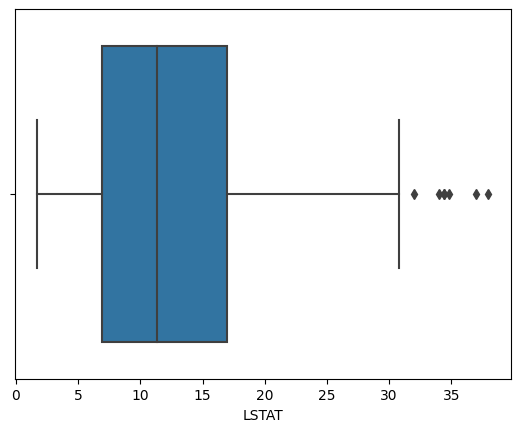

In [24]:
sns.boxplot(x=df['LSTAT'])